# What is the Mood of the News today?

## Task:
For this project I chose to run a sentiment analysis on 12 news related Twitter accounts in order to check the mood of the news. Twleve news sites were split into 3 catagories and 75 tweets from each were pulled for a total of 900 data points. I chose 4 US news sites, 4 international sites, and 4 tabloids (just for fun).

|United States|International|Tabloid|
|-------------|-------------|-------|
|@FoxNews|@BBCWorld|@TheOnion|
|@NYTimes|@ABCaustralia|@NatEnquirer|
|@WashingtonPost|@Echinanews|@TMZ|
|@latimes|@The_Japan_News|@WeeklyWorldNews|


## Process
Using a variety of Python dependencies I was able to seek out current tweets using API's. Then, VADER analysis was used to check the mood of the posts. Eventhough Positive, Negative, and Neutral feeling were analyzed, I chose to use the Compound results for my graphs and analysis. I created and saved a CSV of the results and set up a DataFrame to view those resutls here in Jupyter Notebook. To visualize the many data points I set up a scatter plot with the 75 most recent tweets from each news outlet mapped to the x-axis and the compound score from the VADER analysis mapped on the y-axis. The compound score can be a -1 at the most negative, and a +1 for the absolute most positive tweet.
Also, a bar graph was set up to view the mean score for each news outlet (the scatter plot can be a lot to take in {900 points after all} so the bar graph may easier to visually digest). 



## Analysis:
The two days that I checked the mood showed US news trending negative, international trending positive, and the tabloids trending mostly neutral except for @NatEnquirer which was very negative on both days (I guess men pregnant with bat babies gets a low score). To get a more in depth (and meaningful) result from this excersise I could check the Mood of the News 
over a week, or month. 

In [12]:
# import dependencies

import time
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Twitter API keys (remote location)
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Set up VADER analysis

analyzer = SentimentIntensityAnalyzer()

# Set up Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# set up empty list to append to
news_mood = []

target_users = ("@FoxNews", "@NYTimes", "@WashingtonPost", "@latimes",
                "@BBCWorld", "@ABCaustralia", "@Echinanews", "@The_Japan_News",
                "@TheOnion", "@NatEnquirer", "@TMZ", "@WeeklyWorldNews")

# set up for loop to append to news_mood list
for user in target_users:
    
    # set counter
    row_counter = 1
    
    # set up API call 
    public_tweets = api.user_timeline(user, count = 75)
    
    # loops through all tweets
    for tweet in public_tweets:
        
        # VADER
        # the following line is the print statement for each tweet, toggle to view the intermediate data
        print(f"{user} Tweet #{row_counter}: \n {tweet['text']} \n")
        compound = round(analyzer.polarity_scores(tweet["text"])["compound"],2)
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        tweet_ago = row_counter
        tweet_text = tweet["text"]

        # add sentiment for each tweet to sentiments list
        news_mood.append({"User": user,
                          "Date": tweet["created_at"],
                          "Compound": compound,
                          "Positive": pos,
                          "Negative": neg,
                          "Neutral": neu,
                          "Tweets Ago": row_counter,
                          "Tweet Text": tweet_text})
        row_counter += 1        
        

@FoxNews Tweet #1: 
 Remembering @SenJohnMcCain: Senate pays tribute as Trump issues belated statement https://t.co/9vRw2WrP4o https://t.co/fNhWM643xN 

@FoxNews Tweet #2: 
 Larry Kudlow on trade deal with Mexico: "[President @realDonaldTrump's] tactics and his aggressiveness and his plai… https://t.co/tYSIBA6Xf1 

@FoxNews Tweet #3: 
 Luis Videgaray Caso on U.S.-Mexico trade deal: "It's a breakthrough and it shows that two countries can actually ge… https://t.co/Y3v3l9FFwP 

@FoxNews Tweet #4: 
 Hawaii's team celebrates together after their 3-0 win over South Korea in the Little League World Series Championsh… https://t.co/21XH5FducY 

@FoxNews Tweet #5: 
 Levin on Indictment or Impeachment: Trump in 'Great Shape' Under the Law https://t.co/xk1dJrlfgT 

@FoxNews Tweet #6: 
 Florida candidates flock to Jacksonville ahead of highly anticipated primary https://t.co/eL6WDFWTOL 

@FoxNews Tweet #7: 
 Jacksonville Jaguars Blake Bortles helps deliver meals to officers working mass shooting h

@NYTimes Tweet #1: 
 RT @katierogers: The president ignored pleas from top advisers, including VP Pence, Kelly, Sanders and Shine to issue a unifying and prompt… 

@NYTimes Tweet #2: 
 Why did the interview with Sarah Palin never air on Sacha Baron Cohen’s “Who Is America?” Showtime isn’t saying. https://t.co/GhaJuMambb 

@NYTimes Tweet #3: 
 RT @nytimes: @mschwirtz Nearly 2 dozen Rohingya refugees say one Buddhist neighbor, above all, is responsible for the mass slaughter in the… 

@NYTimes Tweet #4: 
 @mschwirtz Nearly 2 dozen Rohingya refugees say one Buddhist neighbor, above all, is responsible for the mass slaug… https://t.co/k5Z7iwN3Iq 

@NYTimes Tweet #5: 
 RT @mschwirtz: The Rohingya of one Myanmar village know the man who raped and tortured them for years. They say he helped soldiers torch th… 

@NYTimes Tweet #6: 
 How Robin Williams made one specific joke both funny and sad https://t.co/FJ29Tj9rEi 

@NYTimes Tweet #7: 
 RT @nytopinion: If Republicans retain control of both h


@NYTimes Tweet #70: 
 Black men have the lowest life expectancy of any ethnic group in the United States. Researchers believe it may be b… https://t.co/Y90gdLdpZM 

@NYTimes Tweet #71: 
 Your saliva might help you learn to eat your greens https://t.co/5mkDuPzDcV 

@NYTimes Tweet #72: 
 This farro with salmon, cucumber, radicchio and dill recipe goes from crunchy cool to warm and comforting in every… https://t.co/CZU2GAZEnV 

@NYTimes Tweet #73: 
 The pan-fried zucchini planks in this marinated zucchini with farro, chickpeas and parmesan recipe will add extra c… https://t.co/ZH2c0FK4NE 

@NYTimes Tweet #74: 
 Bill Cunningham, for many years the fashion and society photographer for The Times, left a memoir behind when he di… https://t.co/Db2csht5rt 

@NYTimes Tweet #75: 
 Sketchbook: Back-to-School Blues https://t.co/WI6qiuDr2G 

@WashingtonPost Tweet #1: 
 Tesla without Elon Musk? How a once-unthinkable idea became unavoidable. https://t.co/RyePU4kR6A 

@WashingtonPost Tweet #2: 
 Desp

@latimes Tweet #1: 
 North Carolina congressional districts were unconstitutionally gerrymandered to aid Republicans, a federal court ha… https://t.co/n5nGpqArkW 

@latimes Tweet #2: 
 Taking the SAT is hard enough. Then students learned the test's answers may have been leaked online. https://t.co/AHRrhtUSBY 

@latimes Tweet #3: 
 Donald Trump, the pariah president. https://t.co/RH3SZQdrom 

@latimes Tweet #4: 
 In California, Democratic congressional leaders are facing a mutiny over the gas tax https://t.co/B1RH3V3eoe https://t.co/lOzWDVaCwP 

@latimes Tweet #5: 
 A 74-year-old woman cried tears of joy when a Utah state judge took the rare step of declaring her and her longtime… https://t.co/dt7xZiH2i9 

@latimes Tweet #6: 
 Trump, after two days and veterans' backlash, expresses respect for McCain and lowers flags until his burial… https://t.co/qQWdZRJVBp 

@latimes Tweet #7: 
 Since surviving a 100% arterial blockage – a type of heart attack known as the "widow-maker" – filmmaker Ke

@BBCWorld Tweet #1: 
 Malcolm Turnbull: Australian ex-PM 'to quit parliament' https://t.co/cMY1GALOmH 

@BBCWorld Tweet #2: 
 Left behind: How Venezuela crisis is tearing families apart https://t.co/WAYjqIeRtk 

@BBCWorld Tweet #3: 
 May's mission to woo Africa after Brexit https://t.co/X05V7mWFGT 

@BBCWorld Tweet #4: 
 Children 'ready to flee’ violence at Greek refugee camp https://t.co/x6Z07im3Yi 

@BBCWorld Tweet #5: 
 Student loan watchdog: US 'turned its back' on students https://t.co/C80uyX33XJ 

@BBCWorld Tweet #6: 
 Vanesa Campos: Five charged with murdering Paris transgender prostitute https://t.co/p2MxeaEgZI 

@BBCWorld Tweet #7: 
 Germany migrants: Protesters face off in Chemnitz https://t.co/1mxXiC1LT4 

@BBCWorld Tweet #8: 
 John McCain: The angry politics of late senator's death https://t.co/6Pxcc8ioDK 

@BBCWorld Tweet #9: 
 Pope Francis' Skoda donated to homeless charity https://t.co/w8i9Wovd8U 

@BBCWorld Tweet #10: 
 US boy, 9, killed himself after homophobic bullyin

@ABCaustralia Tweet #1: 
 Many people are leaving the city for the country. Is this the new Australian dream? https://t.co/rE5qBv5iwN |… https://t.co/oaSYa0eE1S 

@ABCaustralia Tweet #2: 
 What it's like when Mum and Dad move in
https://t.co/pDDRmT0Dfe | #ABCLife https://t.co/UpOQxe1A5d 

@ABCaustralia Tweet #3: 
 There could be hundreds of planets covered in oceans up to 1,000km deep, scientists say. https://t.co/TORKlFe9Uz |… https://t.co/J71F68ilXG 

@ABCaustralia Tweet #4: 
 Australia's second-richest man stops buying land as apartment downturn bites. https://t.co/qi6xgr18ju | @abcnews https://t.co/nMEB5eCb5O 

@ABCaustralia Tweet #5: 
 Curious Canberra: What are Canberra's most haunted places? https://t.co/Yimjq3DECH | @abccanberra https://t.co/agHe1vyx4f 

@ABCaustralia Tweet #6: 
 An alternative to fast food is having a positive impact on people who consciously choose what they eat… https://t.co/eB8Dj6nnrz 

@ABCaustralia Tweet #7: 
 Having a fight at work? Here's how to navigat

@Echinanews Tweet #1: 
 Probably the cuddliest artist ever! One handred art works by Giant panda Yang Yang in Vienna will be sold online to… https://t.co/PsZjNbl9CD 

@Echinanews Tweet #2: 
 U.S. gun control group hails federal judge ban on online blueprints for 3D weapons  https://t.co/fZmzfGaPrg https://t.co/LhzfpzrDDg 

@Echinanews Tweet #3: 
 China will include expenses of caring for elderly people in the categories of tax-deductible items while setting th… https://t.co/C1sYLoX6Tz 

@Echinanews Tweet #4: 
 #ChinaBiz: China's top financial regulatory body advocated greater control of potential financial risks emerging fr… https://t.co/WA8oh3Dhnl 

@Echinanews Tweet #5: 
 The #BeltandRoad  Initiative does not aim at a geopolitical or military alliance, nor  will it establish a small bl… https://t.co/I1hwE90Ka7 

@Echinanews Tweet #6: 
 Spanish police seize cocaine-stuffed pineapples at Madrid's wholesale fruit and vegetable market as drug smugglers… https://t.co/RZaFc5M3lP 

@Echinan

@The_Japan_News Tweet #1: 
 IOC grapples with #esports dilemma 
https://t.co/mPxuPOwCDe 

@The_Japan_News Tweet #2: 
 Poll: 42% pick Abe as LDP president 
https://t.co/5S2N7xunPn 

@The_Japan_News Tweet #3: 
 ‘Chibi Maruko-chan’ #manga author Momoko Sakura dies at 53
https://t.co/WqiMmzjepM  #chibimaruko #ちびまる子ちゃん 

@The_Japan_News Tweet #4: 
 Ushiro repeats as #decathlon champion at the #AsianGames2018  
https://t.co/yYRkGvjHi9 

@The_Japan_News Tweet #5: 
 Global Economy / Are U.S. regulations functioning 10 years after Lehman collapse? 
https://t.co/PWVSNNmCXS 

@The_Japan_News Tweet #6: 
 Unified system planned to flag child abuse risk / Govt to simplify procedures for authorities to share data
https://t.co/arCGGJRDnL 

@The_Japan_News Tweet #7: 
 Fire ＃festival signals close of Mt. #Fuji climbing season - The Japan News https://t.co/qQyNtUj4iy #富士山 

@The_Japan_News Tweet #8: 
 Govt to monitor #microplastic pollution with #AI device
https://t.co/zDwjqZkKuC 

@The_Japan_News Tweet 

@TheOnion Tweet #1: 
 Dorm Room Decorated With Empty Bottles Of Adderall https://t.co/pTrHuprr9a https://t.co/HBuvQXICRO 

@TheOnion Tweet #2: 
 "It is with great reverence that we celebrate the courage, life, and work of the woman who told John McCain at a 20… https://t.co/UrAvNTMlKb 

@TheOnion Tweet #3: 
 National News Highlights https://t.co/5IzZfQatye 

@TheOnion Tweet #4: 
 Study Finds Girls Go Through Manga Phase Earlier Than Boys https://t.co/HadjSOMD1e https://t.co/HYYyfLshOu 

@TheOnion Tweet #5: 
 For more exemplary journalism, visit https://t.co/csf5QUbhed. https://t.co/TtuBzMaHwY 

@TheOnion Tweet #6: 
 RT @ClickHole: Wow. @ElonMusk just made a huge announcement. https://t.co/cdPtiQgFYe 

@TheOnion Tweet #7: 
 RT @TheOnion: Mail For Former Resident Looks Important https://t.co/I7oPuILL8Y https://t.co/kGwNovmxtr 

@TheOnion Tweet #8: 
 New ‘Game of Thrones’ Teaser Shows Cackling, Power-Mad George R.R. Martin Burning Completed ‘Winds Of Winter’ Manus… https://t.co/ZGbkdmjq7F

@NatEnquirer Tweet #1: 
 Carrie Underwood — Insiders Claim Her Pregnancy Could Save Her Marriage! https://t.co/ulMSMKGrhY https://t.co/CwKaCJo9j5 

@NatEnquirer Tweet #2: 
 Angelina Jolie Running Up $50M Legal Bill In Brutal Divorce From Brad Pitt! https://t.co/UOaecnVK0p https://t.co/XR8OqslYit 

@NatEnquirer Tweet #3: 
 Mel B Sex Tapes Exposed Her Addictions, Say Pals — Insiders Reveal The Secrets That Drove #AGT Judge To Rehab!… https://t.co/vIpLnEJ0UQ 

@NatEnquirer Tweet #4: 
 How Catherine Oxenberg Saved Her Kid From Sex Cult Hell — Seven Years Of #NXIVM Torture! https://t.co/f4GSRlPn40 https://t.co/Nv9NA0irJp 

@NatEnquirer Tweet #5: 
 Carole Radziwell Makes Plans To Move From #RHONY To #TheView!  https://t.co/qmGoJ0pe7Y https://t.co/66dOIeKmWp 

@NatEnquirer Tweet #6: 
 Oasis Singer Liam Gallagher Grabs Girlfriend By Throat In Shock Video — Caught On Tape! https://t.co/h7sk4HbjI4 https://t.co/LwZJAju3Jl 

@NatEnquirer Tweet #7: 
 Miami Male Model Caught On Camera Killing Homele

@TMZ Tweet #1: 
 Trey Songz Sued by Woman Who Claims He Attacked Her https://t.co/KuHDNxWGl7 

@TMZ Tweet #2: 
 See how Dr. Drew pushed back about her husband’s hateful comments (via @toofab)
https://t.co/1iopqExagD 

@TMZ Tweet #3: 
 Kylie Jenner Lists $5 Million Plot of Land 10 Months After Buying It https://t.co/mLkkn6v4xJ 

@TMZ Tweet #4: 
 You gotta get to know Halsey before you can unzip it … #TMZ https://t.co/X4N1oyCYEn 

@TMZ Tweet #5: 
 Taylor Swift &amp; Boyfriend Joe Alwyn Step Out for a Date Night in London! (Pics) #TaylorSwift #JoeAlwyn (via… https://t.co/QPkcVIBz3S 

@TMZ Tweet #6: 
 Trippie Redd Drops $50k on Diamond Grill https://t.co/ZpfGxZp1VL 

@TMZ Tweet #7: 
 Fat Joe Sued by Ex-Business Partner in UP NYC Shoe Store https://t.co/eXXEnqlHGL 

@TMZ Tweet #8: 
 Kim Kardashian is 👅💦 it up like a 🐶 https://t.co/AAZTkXoeqm 

@TMZ Tweet #9: 
 Hollywood Needs to Start Holding Casual Homophobes Accountable (via @PopCrush) https://t.co/EazW69WBAr 

@TMZ Tweet #10: 
 Kim Karda

@WeeklyWorldNews Tweet #1: 
 Poodle Horror! Tick bite suspected source. #weeklyworldnews #tick #tickbite #rockymountspottedfever #poodle… https://t.co/qonks2pu1s 

@WeeklyWorldNews Tweet #2: 
 “It was the loneliest 4 days of my life” says Jackie Stegler #weeklyworldnews #secretary #stuck #lonely #lonelygirl… https://t.co/1u1WzxjnV0 

@WeeklyWorldNews Tweet #3: 
 Boneless Baby Lives In A Bucket! #weeklyworldnews #baby #infant #babyshower #babies #babys #miracle #news https://t.co/UreyFvKaSY 

@WeeklyWorldNews Tweet #4: 
 New Series! - ‘My 3000 Pound Life’ #weeklyworldnews #fat #diet #dietplan #my600lblife #my600poundlife… https://t.co/XbPTHc63vR 

@WeeklyWorldNews Tweet #5: 
 DIVORCED! #weeklyworldnews #divorce #divorced #gas #farting #divorcee #beautiful #beautyandthebeast https://t.co/seT8rYJ98h 

@WeeklyWorldNews Tweet #6: 
 A photo found in a stack of books in the old Historical Library in Lewisburg, WV.....books were donated to WWN by t… https://t.co/HJzwBVOzLt 

@WeeklyWorldNews T

In [3]:
# set up DataFrame
columns = ["User", "Date", "Compound", "Positive", "Negative", "Neutral", "Tweet Text", "Tweets Ago"]
news_mood = pd.DataFrame(news_mood, columns = columns)
news_mood.set_index("Tweets Ago")
# the following command displays the dataframe created, toggle to view the intermediate data
news_mood

,User,Date,Compound,Positive,Negative,Neutral,Tweet Text,Tweets Ago
0,@FoxNews,Tue Aug 28 03:19:29 +0000 2018,0.00,0.000,0.000,1.000,Remembering @SenJohnMcCain: Senate pays tribut...,1
1,@FoxNews,Tue Aug 28 03:10:31 +0000 2018,-0.42,0.000,0.149,0.851,"Larry Kudlow on trade deal with Mexico: ""[Pres...",2
2,@FoxNews,Tue Aug 28 03:04:29 +0000 2018,0.00,0.000,0.000,1.000,Luis Videgaray Caso on U.S.-Mexico trade deal:...,3
3,@FoxNews,Tue Aug 28 02:53:41 +0000 2018,0.82,0.306,0.000,0.694,Hawaii's team celebrates together after their ...,4
4,@FoxNews,Tue Aug 28 02:45:00 +0000 2018,0.62,0.255,0.000,0.745,Levin on Indictment or Impeachment: Trump in '...,5
5,@FoxNews,Tue Aug 28 02:38:00 +0000 2018,0.00,0.000,0.000,1.000,Florida candidates flock to Jacksonville ahead...,6
6,@FoxNews,Tue Aug 28 02:30:00 +0000 2018,0.38,0.178,0.000,0.822,Jacksonville Jaguars Blake Bortles helps deliv...,7
7,@FoxNews,Tue Aug 28 02:22:00 +0000 2018,0.53,0.274,0.000,0.726,"Venus, Serena Williams make winning starts at ...",8
8,@FoxNews,Tue Aug 28 02:13:57 +0000 2018,0.23,0.267,0.180,0.553,Sen. @LindseyGrahamSC opens up on death of fri...,9
9,@FoxNews,Tue Aug 28 02:09:15 +0000 2018,0.49,0.158,0.000,0.842,"Sen. @LindseyGrahamSC on Jeff Sessions: ""The p...",10


In [4]:
len(news_mood)

900

In [5]:
# export DataFrame to CSV file

# news_mood.to_csv("mood_images/Mood_of_News.csv", index = True)

# Visualization

## Scatter Plot

In [6]:
# Set up timestamp for plot titles, and view stamp
timestamp = datetime.now().strftime('%B %d %Y')
print(timestamp)

August 27 2018


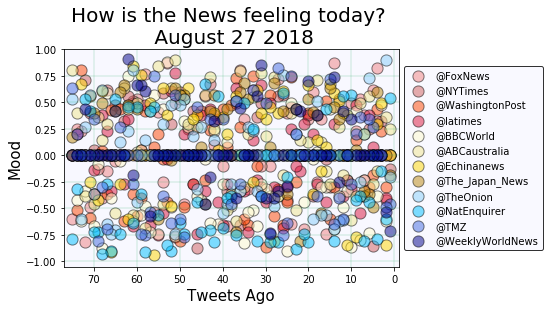

In [7]:
fig, ax = plt.subplots()

# set up grid lines and face color on graph
plt.grid(color = "mediumseagreen", linewidth = .25)
ax.set_facecolor("ghostwhite")

# add title, x axis label and y axis label
plt.title(f"How is the News feeling today? \n {timestamp}", fontsize = 20)
plt.xlabel("Tweets Ago", fontsize = 15)
plt.ylabel("Mood", fontsize = 15)

# set x axis range ** decending from most recent tweet (-1) back to last tweet (100)
plt.xlim(77,-1)

# set y axis range from most negative (-1) to most positive (1)
plt.ylim(-1.05,1)

color = ["lightcoral",
         "indianred",
         "orangered",
         "crimson",
         "lemonchiffon",
         "khaki",
         "gold",
         "darkgoldenrod",
         "lightskyblue",
         "deepskyblue",
         "royalblue",
         "darkblue"
]

color_code = 0

# create scatter plot using for loop to 
for user in target_users:
    dataframe = news_mood.loc[news_mood["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],
                dataframe["Compound"],
                label = user,
                alpha = .5,
                edgecolor = "k",
                s = 125,
                color = color[color_code])
    color_code += 1
    
# set up legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor = "ghostwhite", edgecolor = "k")

# Save image and show graph
# plt.savefig("mood_images/Mood_of_News_scatter1", bbox_inches = "tight", dpi = 100)
plt.show()

In [8]:
avg_mood = news_mood.groupby("User")["Compound"].mean()
avg_mood = avg_mood[["@FoxNews", "@NYTimes", "@WashingtonPost", "@latimes",
                "@BBCWorld", "@ABCaustralia", "@Echinanews", "@The_Japan_News",
                "@TheOnion", "@NatEnquirer", "@TMZ", "@WeeklyWorldNews"]]

# Visualization

## Bar Chart

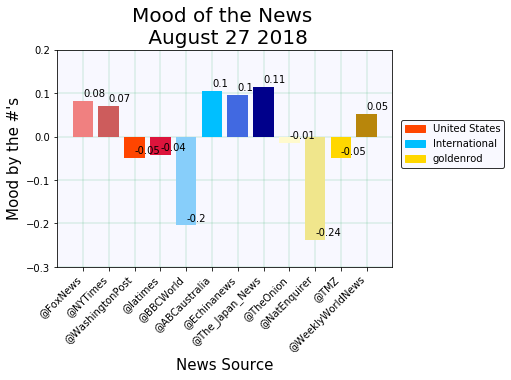

In [13]:
fig, ax = plt.subplots()


# set face color of graph
ax.set_facecolor("ghostwhite")
plt.ylim(-.30, .2)

# set up grid lines and set behind graph
plt.grid(color = "mediumseagreen", linewidth = .25)
ax.set_axisbelow(True)

# rotate x-axis labels so they fit
plt.xticks(rotation = 45, horizontalalignment = "right")

# set labels for title, x-axis and y-axis. Include timestamp in title
plt.title(f"Mood of the News \n {timestamp}", fontsize = 20)
plt.xlabel("News Source", fontsize = 15)
plt.ylabel("Mood by the #'s", fontsize = 15)

# set counter to iterate through news twitter account
count = 0

# set up loop to populate graph with each news twitter account
for sentiment in avg_mood:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count += 1

# set up bar chart
plt.bar(np.arange(len(avg_mood)), avg_mood, tick_label = avg_mood.index,
        color = ["lightcoral","indianred","orangered","crimson",
                 "lightskyblue","deepskyblue","royalblue","darkblue",
                 "lemonchiffon","khaki","gold","darkgoldenrod"])
# set up legend keys
red_patch = mpatches.Patch(color = "orangered", label = "United States")
blue_patch = mpatches.Patch(color = "deepskyblue", label = "International")
yellow_patch = mpatches.Patch(color = "gold", label = "goldenrod")

# set up legend
plt.legend(markerfirst = True, handles = [red_patch, blue_patch, yellow_patch],
          fancybox = True, edgecolor = "black", bbox_to_anchor = (1.35, 0.7),
          facecolor = "ghostwhite")

# Save image and show graph
# plt.savefig("mood_images/Mood_of_News_bar1", bbox_inches = "tight", dpi = 100)
plt.show()